In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from utils_lstm import load_lstm_dfs, load_train_test_lstm
from lstm_data_prep import LstmDataPrep
from sklearn.preprocessing import StandardScaler


2024-02-26 20:13:13.732182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
list_of_dfs=load_lstm_dfs()
train_set, test_set = load_train_test_lstm(list_of_dfs=list_of_dfs)

In [4]:
print("Train Shape: ",train_set.shape)
print("Test Shape:" ,test_set.shape)

Train Shape:  (13600, 10)
Test Shape: (37401, 10)


New Try

In [8]:
model_pipe = LstmDataPrep(num_splits=34).model_pipeline()

In [9]:
model_pipe

Pipeline(steps=[('transformations',
                 FeatureUnion(transformer_list=[('part_0',
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classifier',
                                                                  <lstm_model.LstmModel object at 0x142293340>)])),
                                                ('part_1',
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classi...
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classifier',
                                                                  <lstm_model.LstmModel object at 0x1422f8970>)])),
                                                ('part_29',
                                                 Pipeline(steps=[('drop_targets',
                                                                  DropColumnTransformer(columns_to_drop=['changepoint',
                                                                                                         'anomaly'])),
                                                                 ('classifier',
                                                                  <lstm_model.LstmModel object at 0x1422f8a90>)])), ...])),
                ('processing_results', AggregateModelScores())])

In [10]:
# res1 = model_pipe.fit(list_of_dfs[0][:400])
res1 = model_pipe.fit_transform(train_set)

(400, 8)
[[ 0.14336242 -0.21437812 -0.77086653  1.22538292  0.7473357   0.57160501
  -0.95271795 -0.61428113]
 [-0.24423838 -0.30555175  0.41459621  2.47577367  0.92107747  0.77054428
   0.29866113 -0.59166427]
 [-0.80240301 -0.63091507  0.57133932 -0.02500782  0.85528941  0.83133128
   0.45151566 -0.61428113]]
425/425 [==============================] - 1s 2ms/step
(400, 8)
[[ 0.91459061 -0.12482265  0.72012131 -0.10496983 -1.64658342 -1.43646923
  -0.0166719   0.99437895]
 [-1.70994725 -1.78209307  1.73144744 -1.30462497 -1.68473686 -1.77999252
  -0.9264519  -0.99446977]
 [ 0.73864801  0.15829347  0.12100156 -0.10496983 -1.83629082 -1.71046995
   0.66873905  0.99437895]]
425/425 [==============================] - 1s 2ms/step
(400, 8)
[[ 0.16151363 -0.3115058  -0.10899664 -0.08120082  0.58988083  0.65432099
   0.4347616   2.62104732]
 [-0.3653653   1.18209095  0.14921109 -0.08120082  0.76833517  0.68372501
   0.74715141 -2.24560442]
 [ 0.27427557 -0.08142845  0.26461025  1.1680432   0.

In [11]:
# res2 = model_pipe.transform(list_of_dfs[0])
res2 = model_pipe.transform(test_set)

1169/1169 [==============================] - 3s 3ms/step
X.shape:  (37396, 34)


In [13]:
res2

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_27,model_28,model_29,model_30,model_31,model_32,model_33,avg_prediction,median_prediction,max_prediction
0,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
1,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
3,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
4,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.941176,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37391,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0
37392,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0
37393,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0
37394,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0.911765,1.0,1.0


In [19]:
y_pred = res2['avg_prediction']
y_pred.shape

(37396,)

In [29]:
y_pred.describe()

count    37396.000000
mean         0.914560
std          0.040037
min          0.794118
25%          0.882353
50%          0.911765
75%          0.941176
max          1.000000
Name: avg_prediction, dtype: float64

In [17]:
y_test = test_set['anomaly'][5:]

In [18]:
y_test.value_counts().sum()

37396

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import numpy as np

In [58]:
def calc_metrics(y_true,y_pred):
    th = 0.91
    accuracy = accuracy_score(y_true, np.where(y_pred>=th,1,0))
    cm = confusion_matrix(y_true, np.where(y_pred>=th,1,0))
    f1 = f1_score(y_true, np.where(y_pred>=th,1,0))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    return accuracy,cm,f1,fpr, tpr, thresholds, roc_auc

def plot_metrics(cm, fpr, tpr, roc_auc, thresholds, title = 'Model Evaluation Metrics'):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    fig.suptitle(title, fontsize=16, y=1.02)
    confusion_matrix_ax = ax[0]
    roc_curve_ax = ax[1]

    # Confusion Matrix in the first subplot
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=confusion_matrix_ax,cmap='Blues')
    confusion_matrix_ax.set_title('Confusion Matrix')
    confusion_matrix_ax.set_xlabel('Predicted labels')
    confusion_matrix_ax.set_ylabel('True labels')

    # ROC Curve in the second subplot
    roc_curve_ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    roc_curve_ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    roc_curve_ax.set_xlabel('False Positive Rate')
    roc_curve_ax.set_ylabel('True Positive Rate')
    roc_curve_ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    roc_curve_ax.legend(loc='lower right')
    # Display the plot
    plt.tight_layout()
    plt.show()

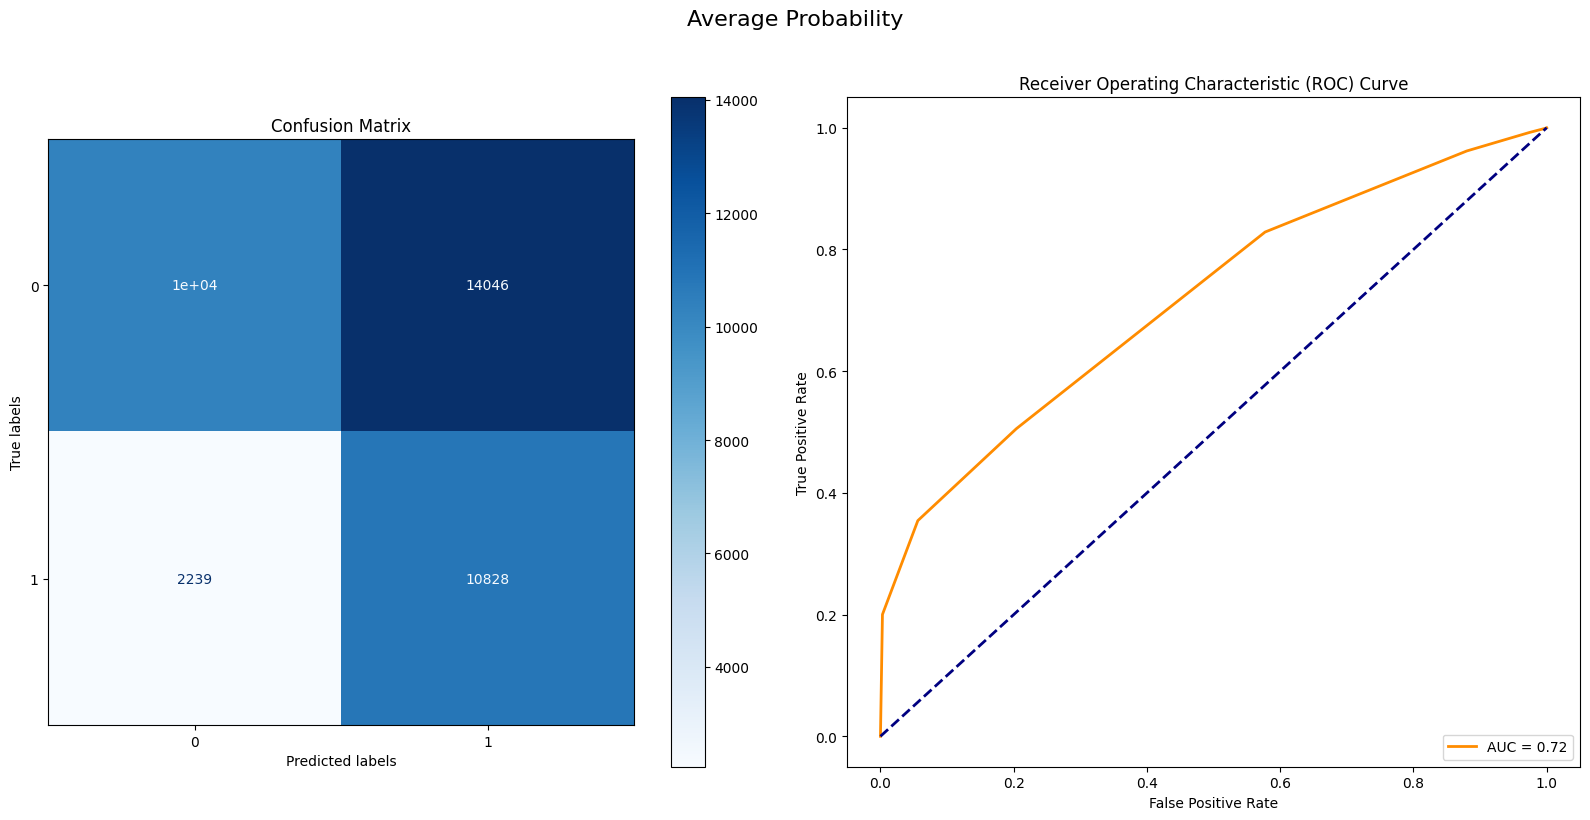

In [59]:
accuracy, cm, f1, fpr, tpr, thresholds, roc_auc = calc_metrics(y_test,y_pred)
plot_metrics(cm, fpr, tpr, roc_auc, thresholds, title = 'Average Probability')

In [54]:
accuracy

0.6944860412878383

In [55]:
f1

0.5362289425613964

In [60]:
cm

array([[10283, 14046],
       [ 2239, 10828]])

## MAR

In [61]:
2239/(2239+10828)

0.1713476697023035

In [ ]:
# from lstm_model import LstmModel
# model = LstmModel(y_test=y_test,partition_num=1)
# model.fit(x,y)
# res = model.transform(x_test)
